In [163]:
import pandas as pd
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Giới thiệu về Dữ liệu Sentiment140

## Bối cảnh
Dữ liệu này là tập dữ liệu Sentiment140, bao gồm 1.600.000 tweet được trích xuất từ API của Twitter. Các tweet này đã được chú thích (0 = tiêu cực, 4 = tích cực) và có thể được sử dụng để phát hiện cảm xúc (sentiment).

## Nội dung
Tập dữ liệu bao gồm 6 trường dữ liệu sau:

- **target**: Tính chất cảm xúc của tweet (0 = tiêu cực, 2 = trung lập, 4 = tích cực)
- **ids**: ID của tweet (ví dụ: 2087)
- **date**: Ngày đăng tweet (ví dụ: Sat May 16 23:58:44 UTC 2009)
- **flag**: Truy vấn liên quan đến tweet. Nếu không có truy vấn, giá trị này sẽ là "NO_QUERY".
- **user**: Người dùng đã đăng tweet (ví dụ: robotickilldozr)
- **text**: Nội dung của tweet (ví dụ: Lyx is cool)


In [164]:
# các thuộc tính chưa có tên --> đặt lại
df.columns =['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# 1. Tiền xử lí dữ liệu

In [165]:
df['text'] = df['text'].str.replace(r'https\S+|www\S+','',regex = True)
df['text'] = df['text'].str.replace(r'http\S+|www\S+','', regex = True)
df['text'] = df['text'].str.replace(r'@\S+','', regex = True)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,- A that's a bummer. You shoulda got David ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [167]:
# chuyển định dạng ngày tháng
df['date'] = pd.to_datetime(df['date'], format = '%a %b %d %H:%M:%S PDT %Y')
df

,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,- A that's a bummer. You shoulda got David ...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."
...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [168]:
import numpy as np
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [169]:
# Lấy các giá trị lặp lại trong cột flage
unique_value = df['flag'].unique()
unique_value

array(['NO_QUERY'], dtype=object)

In [170]:
df.describe()

,target,ids,date
count,1.600000e+06,1.600000e+06,1600000
mean,2.000000e+00,1.998818e+09,2009-05-31 07:26:25.057991168
min,0.000000e+00,1.467810e+09,2009-04-06 22:19:45
25%,0.000000e+00,1.956916e+09,2009-05-28 23:01:17
50%,2.000000e+00,2.002102e+09,2009-06-02 03:08:55
75%,4.000000e+00,2.177059e+09,2009-06-15 05:21:43.249999872
max,4.000000e+00,2.329206e+09,2009-06-25 10:28:31
std,2.000001e+00,1.935761e+08,NaN


# 2. Phân tích và trực quan

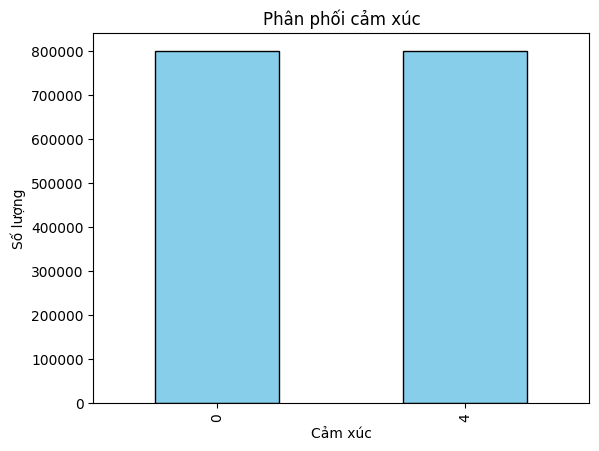

In [90]:
# Phân phối cảm xúc
import matplotlib.pyplot as plt
df['target'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')
plt.show()

**Không bị mất cân bằng dữ liệu**

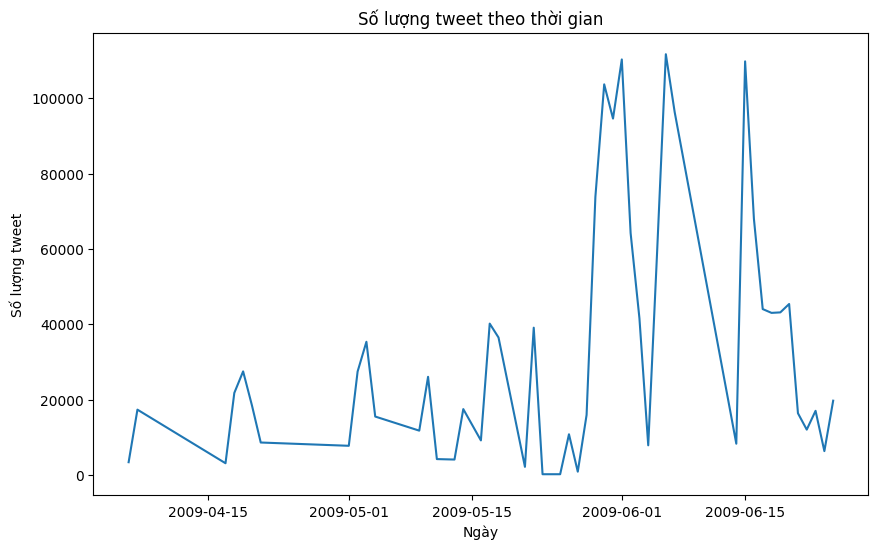

In [11]:
# Sự phân bổ về thời gian
df['date'].dt.date.value_counts().sort_index().plot(kind = 'line', figsize=(10,6))
plt.title('Số lượng tweet theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số lượng tweet')
plt.show()

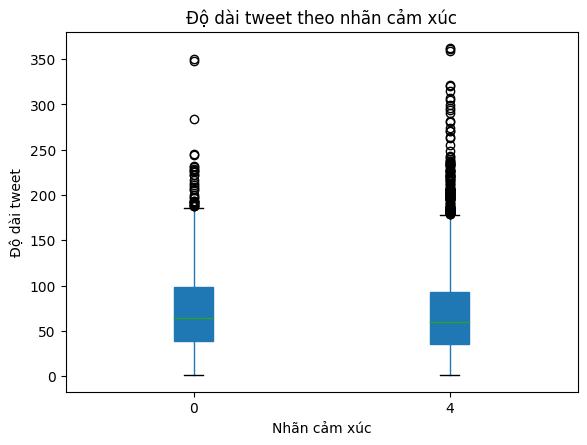

In [12]:
# Mối quan hệ giữa độ dài của tweet và cảm xúc
df['text_length'] =df['text'].apply(len)
df.boxplot(column='text_length', by='target', grid= False,patch_artist=True)
plt.title('Độ dài tweet theo nhãn cảm xúc')
plt.suptitle('')
plt.xlabel('Nhãn cảm xúc')
plt.ylabel('Độ dài tweet')
plt.show()

**--> Có xu hướng nhãn dài tỉ lệ với tiêu cực**

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


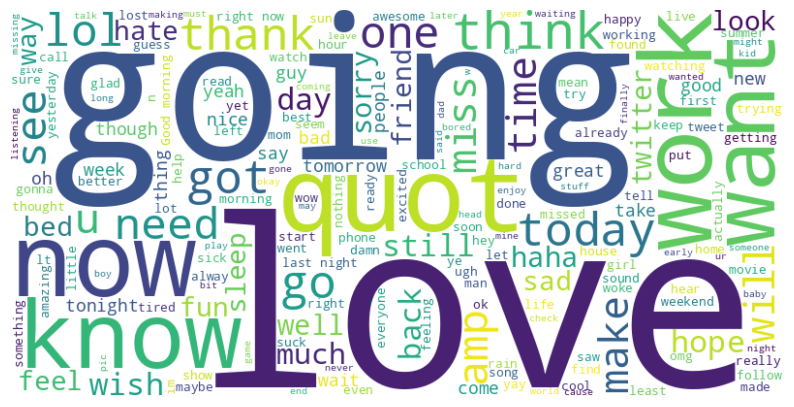

In [15]:
from wordcloud import WordCloud
all_text = ''.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Xây dựng mô hình

In [16]:
pip install transformers torch scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install transformers

In [43]:
pip install 'accelerate>=0.26.0'


Note: you may need to restart the kernel to use updated packages.


In [56]:
!pip install --upgrade transformers


In [171]:
# Đổi giá trị target '4' thành '1' để chỉ có 2 lớp
df['target'] = df['target'].replace(4, 1)

# Lọc các bản ghi có target 0 và 1 (thay vì 4)
df_target_0 = df[df['target'] == 0].sample(n=500, random_state=42)
df_target_1 = df[df['target'] == 1].sample(n=500, random_state=42)

# Kết hợp lại thành một DataFrame mới với 1000 bản ghi
df = pd.concat([df_target_0, df_target_1])

df = df.reset_index(drop=True)
# In ra thông tin của DataFrame mới
print(f"Shape of sampled DataFrame: {df.shape}")
df

Shape of sampled DataFrame: (1000, 6)


,target,ids,date,flag,user,text
0,0,1974671194,2009-05-30 13:36:31,NO_QUERY,simba98,oh no! where did u order from? that's horrible
1,0,1997882236,2009-06-01 17:37:11,NO_QUERY,Seve76,A great hard training weekend is over. a coup...
2,0,2177756662,2009-06-15 06:39:05,NO_QUERY,x__claireyy__x,"Right, off to work Only 5 hours to go until I..."
3,0,2216838047,2009-06-17 20:02:12,NO_QUERY,Balasi,I am craving for japanese food
4,0,1880666283,2009-05-22 02:03:31,NO_QUERY,djrickdawson,Jean Michel Jarre concert tomorrow gotta work...
...,...,...,...,...,...,...
995,1,2188434473,2009-06-15 21:53:36,NO_QUERY,amie_j22,i finally succumbed to twitter.
996,1,1880305202,2009-05-22 00:46:34,NO_QUERY,ellearpon,i just hooked it up to my cell. You just text...
997,1,1553740446,2009-04-18 15:05:02,NO_QUERY,kammer,- Secret Twitter will eat your soul! I kicked...
998,1,1824466613,2009-05-17 01:30:24,NO_QUERY,slikchikusa,Good Morning Ivy enjoy your reading.


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
import seaborn as sns
import matplotlib.pyplot as plt

# Chia dữ liệu tỉ lệ 80-20
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Sử dụng tokenizer của Bert
tokenizer = BertTokenizer.from_pretrained('../input/bert-base-uncased')
# Tạo data collator để padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


# Tokenization của dữ liệu
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding='max_length', max_length=128)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding='max_length', max_length=128)


In [173]:
# Chuyển đổi thành dataset có thể sử dụng với Hugging Face
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Sửa kiểu labels thành torch.long (int64)
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Đảm bảo kiểu long
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(train_encodings, train_labels.values)
test_dataset = Dataset(test_encodings, test_labels.values)


In [174]:
num_labels=len(df['target'].unique())
num_labels

2

In [175]:
# Tạo mô hình BERT cho phân loại văn bản
model = BertForSequenceClassification.from_pretrained('../input/bert-base-uncased', num_labels = 2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../input/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [176]:
# Cấu hình huấn luyện
training_args = TrainingArguments(
    output_dir='./results',          # nơi lưu kết quả
    num_train_epochs=3,              # số epoch
    per_device_train_batch_size=16,  # kích thước batch
    per_device_eval_batch_size=64,   # kích thước batch cho kiểm tra
    warmup_steps=500,                # số bước warmup
    weight_decay=0.01,               # regularization
    logging_dir='./logs',            # thư mục logs
    logging_steps=10,
    evaluation_strategy="epoch",     # Đánh giá mô hình sau mỗi epoch
    save_strategy="epoch",           # Lưu mô hình sau mỗi epoch
    load_best_model_at_end=True,     # Tải lại mô hình tốt nhất
    report_to="none",                # Tắt báo cáo lên WandB
    disable_tqdm=False,              # Giúp theo dõi tiến trình
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [177]:
# Huấn luyện mô hình với Trainer API
trainer = Trainer(
    model=model,                         # mô hình đã được huấn luyện
    args=training_args,                  # các tham số huấn luyện
    train_dataset=train_dataset,         # tập huấn luyện
    eval_dataset=test_dataset,           # tập kiểm tra
    data_collator=data_collator,         # data collator cho tokenizer
)

Epoch,Training Loss,Validation Loss
1,0.694700,0.679814
2,0.626500,0.619918
3,0.563100,0.502249


Eval Results: {'eval_loss': 0.5022493004798889, 'eval_runtime': 37.5773, 'eval_samples_per_second': 5.322, 'eval_steps_per_second': 0.106, 'epoch': 3.0}
Accuracy: 0.78
Precision: 0.7798073063026897
Recall: 0.7792467948717949
F1-Score: 0.7794486215538847


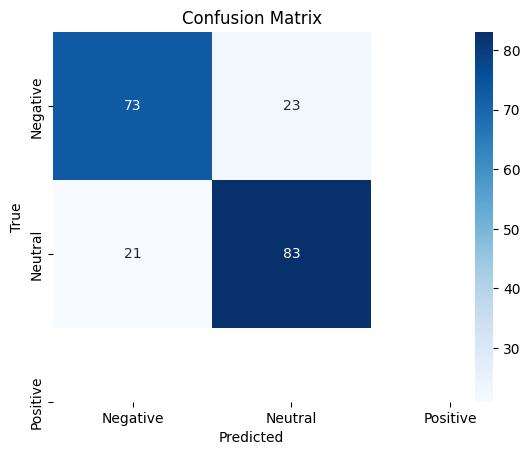

In [178]:
# Huấn luyện mô hình
trainer.train()

# Đánh giá mô hình
eval_results = trainer.evaluate()

# In kết quả đánh giá
print(f"Eval Results: {eval_results}")

# Dự đoán trên tập kiểm tra
predictions, true_labels, _ = trainer.predict(test_dataset)

# Tính toán các chỉ số đánh giá
accuracy = accuracy_score(true_labels, predictions.argmax(axis=1))
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions.argmax(axis=1), average='macro')

# In các chỉ số
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Vẽ biểu đồ Confusion Matrix
cm = confusion_matrix(true_labels, predictions.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [181]:
# Lưu mô hình và tokenizer
model.save_pretrained('/kaggle/working/bert_model')
tokenizer.save_pretrained('/kaggle/working/tokenizer_bert_model')


('/kaggle/working/tokenizer_bert_model/tokenizer_config.json',
 '/kaggle/working/tokenizer_bert_model/special_tokens_map.json',
 '/kaggle/working/tokenizer_bert_model/vocab.txt',
 '/kaggle/working/tokenizer_bert_model/added_tokens.json')

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Đặt đường dẫn tới mô hình bert-base-uncased
bert_base_uncased_path = kagglehub.dataset_download('abhishek/bert-base-uncased')

# Kiểm tra xem mô hình đã được tải xuống thành công hay chưa
print(bert_base_uncased_path)
